![](./img/dl_banner.jpg)

# Pytorch实现梯度下降与线性回归

![](img/pytorch.jpg)

部分源代码：[Github:zihaopytorch](https://github.com/TommyZihao/zihaopytorch)


# 接下来你将做什么

在本案例中，你将使用Pytorch构建线性回归模型，最小化均方误差，通过梯度下降算法训练权重和偏置项。

本案例展示了pytorch的模型定义、超参数定义、损失函数、优化器、前向传播、反向传播、模型评估、可视化、模型存储的完整过程。

## 1.导入工具库

In [1]:
import torch 
import torch.nn as nn # 导入pytorch的nn神经网络模块
import numpy as np # 导入数组计算库numpy
import matplotlib.pyplot as plt # 导入可视化库matplotlib

# 让matplotlib画出的图嵌入在notebook中
%matplotlib inline  

## 2.准备数据

In [44]:
# 构造训练数据的特征
x_train = np.array([[3.3], [4.6], [5.3], [6.7], [6.3], [4.18], 
                    [9.9], [6.182], [7.6], [2.1], [7.02], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

# 构造训练数据的标签
y_train = np.array([[1.7], [2.6], [2.1], [3.2], [1.6], [1.573], 
                    [3.6], [2.9], [2.5], [1.2], [2.8], 
                    [3.6], [1.65], [2.4], [1.3]], dtype=np.float32)

In [57]:
x_train = np.random.standard_normal(15).reshape(15,1).astype('float32')
y_train = 2*x_train + np.random.standard_normal(size=15).reshape(15,1).astype('float32')
print(x_train.dtype,y_train.dtype)

float32 float32


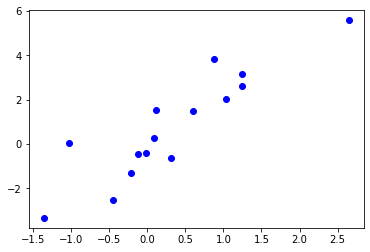

In [58]:
plt.plot(x_train,y_train,'bo')

In [59]:
# 查看训练数据的特征维度，共有15个数据，每个数据只有一个特征
x_train.shape

(15, 1)

In [60]:
# 查看训练数据的标签维度，共有15个数据，每个数据只有一个标签
y_train.shape

(15, 1)

## 3.构建模型、定义损失函数与优化器

In [66]:
input_size = 1 # 输入数据的维度
output_size = 1 # 输出数据的维度
model = nn.Linear(input_size, output_size) # 定义线性模型，输入维度为input_size，输出维度为output_size

# 损失与优化器
criterion = nn.MSELoss() # 损失函数为MSE均方误差损失函数
learning_rate = 0.001 # 定义学习率
# torch.optim.SGD 随机梯度下降
    # weight_decay=0,L2 penalty, 权重衰减(L正则化)，\lambda
    # momentum=0, momentum factor, 动量因子(冲出梯度局部最小值)
    # dampening=0,dampening for momentum, 动量衰减
    # nesterov=False, enables Nesterov momentum, 加速梯度
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # 随机梯度下降优化器，学习率0.001

In [67]:
# random init
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.7301]], requires_grad=True)
Parameter containing:
tensor([-0.0860], requires_grad=True)


## 4.迭代与训练

In [68]:
inputs = torch.from_numpy(x_train) # 将x_train转为Pytorch的张量数据类型
targets = torch.from_numpy(y_train) # 将y_train转为Pytorch的张量数据类型
outputs = model(inputs) # 使用刚刚构建的尚未训练的模型预测一下

In [69]:
outputs

tensor([[-0.1720],
        [ 0.8221],
        [ 0.5516],
        [-0.8340],
        [ 0.6741],
        [-1.0711],
        [-0.4082],
        [-0.0037],
        [-0.2437],
        [-0.0227],
        [-0.1010],
        [ 0.1393],
        [ 0.8241],
        [ 0.3575],
        [ 1.8427]], grad_fn=<AddmmBackward>)

In [70]:
# 将outputs由Pytorch的Tensor张量数据类型转为numpy的array数据类型
outputs = outputs.detach().numpy()

In [71]:
outputs

array([[-0.17202519],
       [ 0.82209116],
       [ 0.5516206 ],
       [-0.8339594 ],
       [ 0.67410773],
       [-1.0710562 ],
       [-0.40821946],
       [-0.00368328],
       [-0.24366733],
       [-0.02270412],
       [-0.10095937],
       [ 0.13934433],
       [ 0.82413954],
       [ 0.357494  ],
       [ 1.8427151 ]], dtype=float32)

绘制模型训练之前的拟合结果，可以看出效果很差

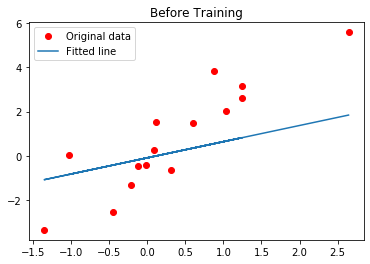

In [72]:
plt.plot(x_train, y_train, 'ro', label='Original data') # 绘制原始数据散点图
plt.plot(x_train, outputs, label='Fitted line') # 绘制拟合直线，注意这里的outputs已经变成了numpy的array数组
plt.legend() # 显示图例
plt.title('Before Training') # 图表标题
plt.show() # 展示图像

开始训练

In [82]:
num_epochs = 350 # 迭代轮次，一个轮次指的是完整过一遍全部的数据
loss_list = [] # 将训练过程中的损失放在loss_list列表里
for epoch in range(num_epochs):
    
    # 把numpy的array数据类型转成pytorch的Tensor类型，定义好训练特征和标签
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 前向计算
    # model = nn.Linear(input_size, output_size)
    outputs = model(inputs) # 获取模型当前推断结果
    # criterion = nn.MSELoss()
    loss = criterion(outputs, targets) # 计算当前模型输出值与标签y的均方误差
    loss_list.append(loss.item()) # 将损失值存入loss_list列表
    
    # 反向传播与优化
    # 如何与其他函数交换参数？？？
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer.zero_grad() # 将各权重的梯度归零，如果没有这行代码，梯度会累加
    loss.backward() # 计算损失函数对各权重的梯度 
    optimizer.step() # 按学习率更新权重值
    
    # 每训练5轮，就输出当前的损失值
    if (epoch+1) % 5 == 0: 
        print('目前进程 [{}/{}], 当前损失: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

目前进程 [5/350], 当前损失: 1.5350
目前进程 [10/350], 当前损失: 1.5252
目前进程 [15/350], 当前损失: 1.5157
目前进程 [20/350], 当前损失: 1.5064
目前进程 [25/350], 当前损失: 1.4973
目前进程 [30/350], 当前损失: 1.4884
目前进程 [35/350], 当前损失: 1.4797
目前进程 [40/350], 当前损失: 1.4713
目前进程 [45/350], 当前损失: 1.4630
目前进程 [50/350], 当前损失: 1.4549
目前进程 [55/350], 当前损失: 1.4469
目前进程 [60/350], 当前损失: 1.4392
目前进程 [65/350], 当前损失: 1.4316
目前进程 [70/350], 当前损失: 1.4242
目前进程 [75/350], 当前损失: 1.4170
目前进程 [80/350], 当前损失: 1.4099
目前进程 [85/350], 当前损失: 1.4030
目前进程 [90/350], 当前损失: 1.3963
目前进程 [95/350], 当前损失: 1.3897
目前进程 [100/350], 当前损失: 1.3832
目前进程 [105/350], 当前损失: 1.3769
目前进程 [110/350], 当前损失: 1.3708
目前进程 [115/350], 当前损失: 1.3647
目前进程 [120/350], 当前损失: 1.3588
目前进程 [125/350], 当前损失: 1.3531
目前进程 [130/350], 当前损失: 1.3474
目前进程 [135/350], 当前损失: 1.3419
目前进程 [140/350], 当前损失: 1.3365
目前进程 [145/350], 当前损失: 1.3312
目前进程 [150/350], 当前损失: 1.3261
目前进程 [155/350], 当前损失: 1.3210
目前进程 [160/350], 当前损失: 1.3161
目前进程 [165/350], 当前损失: 1.3113
目前进程 [170/350], 当前损失: 1.3065
目前进程 [175/350], 当前损失: 1.3019
目前进程 

## 6.可视化与结果展示

绘制模型训练过程中损失值的下降曲线图

Text(0.5, 1.0, 'Training loss')

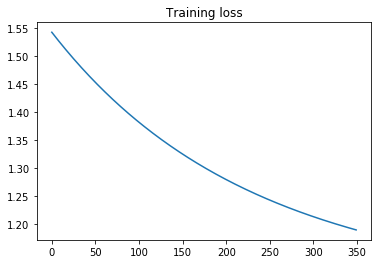

In [83]:
plt.plot(loss_list)
plt.title('Training loss')

获取最终回归拟合结果

In [84]:
outputs = model(inputs)

In [85]:
outputs

tensor([[-0.0240],
        [ 2.4528],
        [ 1.7789],
        [-1.6732],
        [ 2.0841],
        [-2.2639],
        [-0.6125],
        [ 0.3954],
        [-0.2025],
        [ 0.3480],
        [ 0.1530],
        [ 0.7517],
        [ 2.4579],
        [ 1.2953],
        [ 4.9957]], grad_fn=<AddmmBackward>)

In [86]:
# 跟上面一样，将outputs从Pytorch的Tensor张量数据类型转为numpy的array数组类型
outputs = outputs.detach().numpy()

In [87]:
outputs

array([[-0.0240283 ],
       [ 2.4527946 ],
       [ 1.7789221 ],
       [-1.6732253 ],
       [ 2.0840964 ],
       [-2.2639477 ],
       [-0.61250204],
       [ 0.39539248],
       [-0.2025234 ],
       [ 0.34800243],
       [ 0.1530309 ],
       [ 0.7517432 ],
       [ 2.4578981 ],
       [ 1.2952591 ],
       [ 4.995661  ]], dtype=float32)

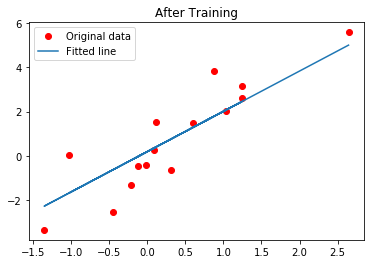

In [88]:
plt.plot(x_train, y_train, 'ro', label='Original data') # 绘制原始数据散点图
plt.plot(x_train, outputs, label='Fitted line') # 绘制拟合直线
plt.legend() # 显示图例
plt.title('After Training') # 设置图表标题
plt.show() # 展示图像

In [89]:
# 存储模型到当前文件所在目录
torch.save(model.state_dict(), './linear_regression_model.ckpt')

# 参考学习资料

Pytorch官方文档：https://pytorch.org/

